<a href="https://colab.research.google.com/github/sallytran02/IS4487/blob/main/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset.  Your target variable is total sales revenue.  


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [21]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [22]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/superstore_retail_orders-2.csv')

Mounted at /content/gdrive


In [23]:
df['total_amount'] = df['quantity'] * df['product_price']

print(df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01          2021-07     Audrey Blanco   
1         51187  2021-07-01          2021-07       Isaac Allen   
2         51199  2021-07-02          2021-07        Ian Morgan   
3         51241  2021-07-04          2021-07        Alexa Bell   
4         51297  2021-07-08          2021-07        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29          2022-06        Ian Rogers   
56041     74062  2022-06-29          2022-06   Marcus Anderson   
56042     74065  2022-06-29          2022-06  Nathaniel Howard   
56043     74038  2022-06-29          2022-06        Robin Sanz   
56044     74110  2022-06-30          2022-06   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2           

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Create a total_amount variable, based on the product price and quantity

In [24]:
#convert the product_price into a number (not a string)

df['product_price'] = pd.to_numeric(df['product_price'].replace('[\$,]', '', regex=True))

df = df.dropna()

#convert the total_amount into a number (not a string)

df['total_amount'] = pd.to_numeric(df['total_amount'].replace('[\$,]', '', regex=True))

df = df.dropna()

print (df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01          2021-07     Audrey Blanco   
1         51187  2021-07-01          2021-07       Isaac Allen   
2         51199  2021-07-02          2021-07        Ian Morgan   
3         51241  2021-07-04          2021-07        Alexa Bell   
4         51297  2021-07-08          2021-07        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29          2022-06        Ian Rogers   
56041     74062  2022-06-29          2022-06   Marcus Anderson   
56042     74065  2022-06-29          2022-06  Nathaniel Howard   
56043     74038  2022-06-29          2022-06        Robin Sanz   
56044     74110  2022-06-30          2022-06   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2           

<ipython-input-24-90df71c6be74>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_amount'] = pd.to_numeric(df['total_amount'].replace('[\$,]', '', regex=True))


In [25]:
# drop null values

import pandas as pd

df.dropna(inplace=True)

In [26]:
# Identify problematic values
print(df['order_year_month'].unique())

# Handle invalid values
# For example, you can remove rows with out-of-range dates
# Or replace them with NaN
df['order_year_month'] = pd.to_datetime(df['order_year_month'], errors='coerce')

# Print the DataFrame to verify changes
print(df)


['2021-07' '2021-08' '2021-09' '2021-10' '2021-11' '2021-12' '2022-01'
 '2022-02' '2022-03' '2022-04' '2022-05' '2022-06' '2029-07' '1922-06'
 '2421-09' '2029-06' '2029-08' '2020-08' '2020-09' '2020-10' '2020-11'
 '2020-12' '2021-01' '2021-02' '2021-03' '2021-04' '2021-05' '2021-06'
 '2020-07' '2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06']
       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01       2021-07-01     Audrey Blanco   
1         51187  2021-07-01       2021-07-01       Isaac Allen   
2         51199  2021-07-02       2021-07-01        Ian Morgan   
3         51241  2021-07-04       2021-07-01        Alexa Bell   
4         51297  2021-07-08       2021-07-01        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29       2022-06-01        Ian Rogers   
56041     74062  2022-06-29       2022-06-01   Marcus Anderson   
56042     74065  2022-06-29       2022-06-01  Nath

In [27]:
# changing order_year_month to datetime format

import pandas as pd

df = pd.DataFrame(df)

df['order_year_month'] = pd.to_datetime(df['order_year_month'])

print(df)


       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01       2021-07-01     Audrey Blanco   
1         51187  2021-07-01       2021-07-01       Isaac Allen   
2         51199  2021-07-02       2021-07-01        Ian Morgan   
3         51241  2021-07-04       2021-07-01        Alexa Bell   
4         51297  2021-07-08       2021-07-01        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29       2022-06-01        Ian Rogers   
56041     74062  2022-06-29       2022-06-01   Marcus Anderson   
56042     74065  2022-06-29       2022-06-01  Nathaniel Howard   
56043     74038  2022-06-29       2022-06-01        Robin Sanz   
56044     74110  2022-06-30       2022-06-01   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2           

In [28]:
import pandas as pd

# Assuming df is your DataFrame

# Convert the 'order_year_month' column to datetime format
df['order_year_month'] = pd.to_datetime(df['order_year_month'])

# Extract the month component and create a new column called 'order_month'
df['order_month'] = df['order_year_month'].dt.month

# Print the DataFrame to verify changes
print(df)


       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01       2021-07-01     Audrey Blanco   
1         51187  2021-07-01       2021-07-01       Isaac Allen   
2         51199  2021-07-02       2021-07-01        Ian Morgan   
3         51241  2021-07-04       2021-07-01        Alexa Bell   
4         51297  2021-07-08       2021-07-01        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29       2022-06-01        Ian Rogers   
56041     74062  2022-06-29       2022-06-01   Marcus Anderson   
56042     74065  2022-06-29       2022-06-01  Nathaniel Howard   
56043     74038  2022-06-29       2022-06-01        Robin Sanz   
56044     74110  2022-06-30       2022-06-01   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2           

## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales Revenue
- Create a bar chart
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales. You can use any variables for these sample plots.

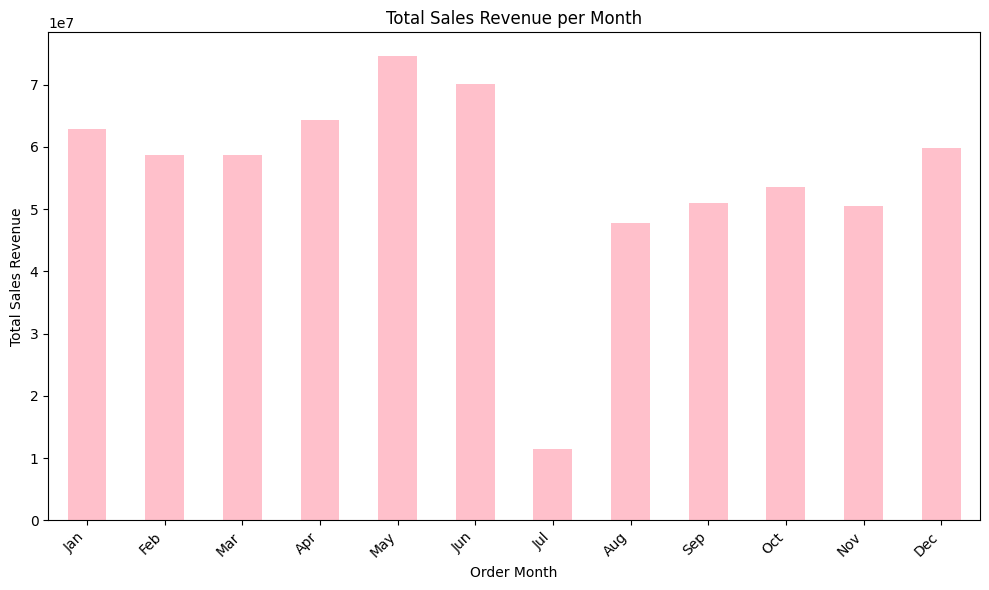

In [29]:
#bar chart

import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Grouping by order month and summing total sales
monthly_sales = df.groupby('order_month')['total_amount'].sum()

# Plotting bar chart
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='pink')

plt.xlabel('Order Month')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue per Month')

plt.xticks(rotation=45, ha='right')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


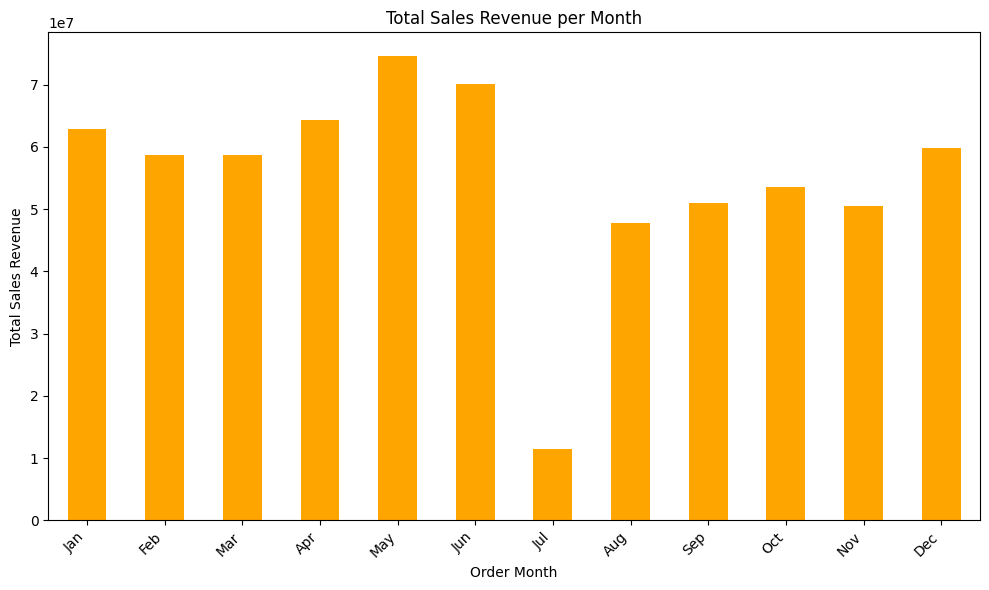

In [30]:
#histogram

import matplotlib.pyplot as plt

monthly_sales = df.groupby('order_month')['total_amount'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='orange')

plt.xlabel('Order Month')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue per Month')

plt.xticks(rotation=45, ha='right')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


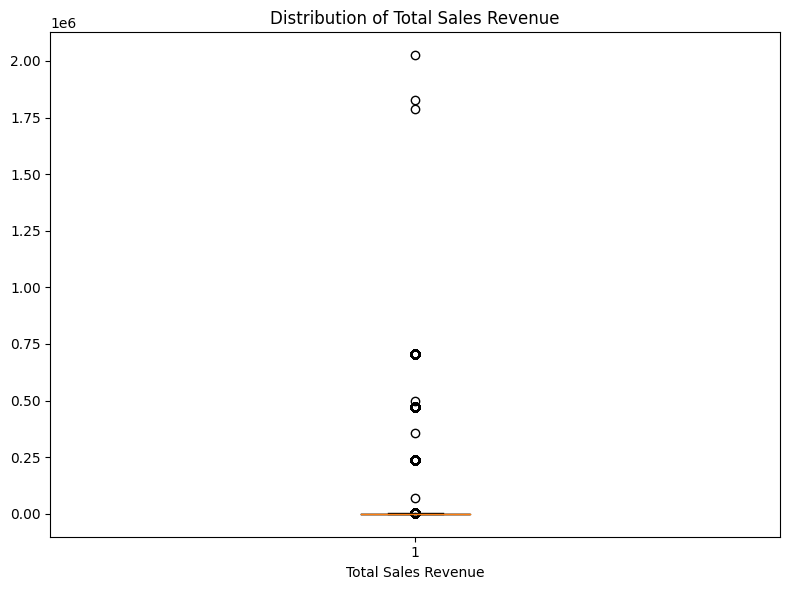

In [31]:
#box plot

plt.figure(figsize=(8, 6))
plt.boxplot(df['total_amount'])

plt.xlabel('Total Sales Revenue')
plt.title('Distribution of Total Sales Revenue')

plt.tight_layout()
plt.show()


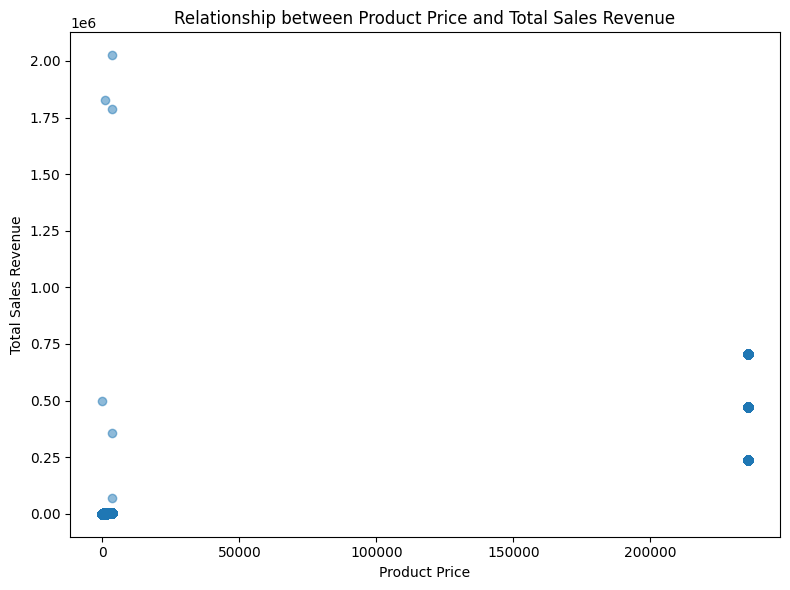

In [32]:
#scatter plot

plt.figure(figsize=(8, 6))
plt.scatter(df['product_price'], df['total_amount'], alpha=0.5)

plt.xlabel('Product Price')
plt.ylabel('Total Sales Revenue')
plt.title('Relationship between Product Price and Total Sales Revenue')

plt.tight_layout()
plt.show()


## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales  
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

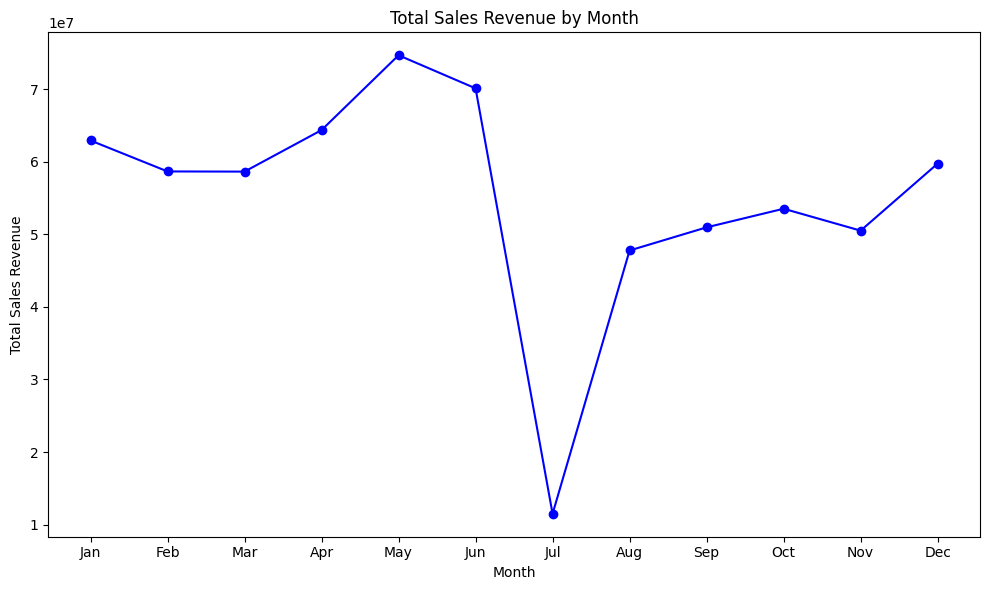

In [33]:
#month of year

df['order_month'] = df['order_year_month'].dt.month
monthly_sales = df.groupby('order_month')['total_amount'].sum()

# Plotting line plot
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')

plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue by Month')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()



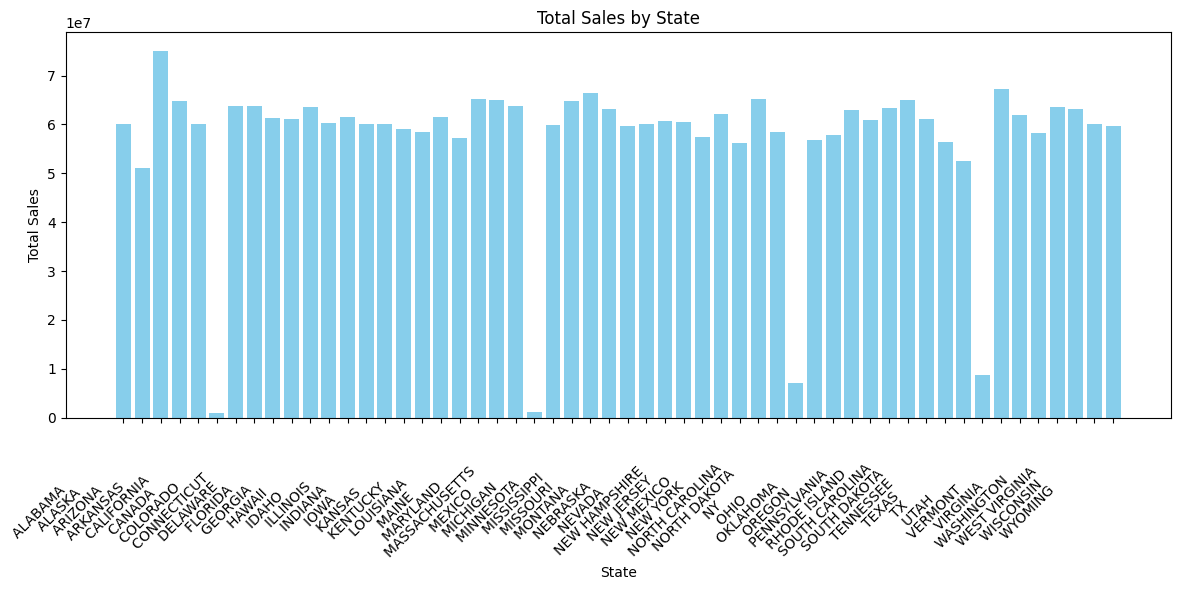

In [20]:
#sales by state

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(df)

# Group by state and calculate total sales for each state
sales_by_state = df.groupby('state_province')['total_amount'].sum().reset_index()

# Plot the sales data with larger figure size and rotated x-axis labels
plt.figure(figsize=(12, 6))
plt.bar(sales_by_state['state_province'], sales_by_state['total_amount'], color='skyblue')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [35]:
#sales by product

product_sales = df.groupby('product_name')['total_amount'].sum()
best_product = product_sales.idxmax()
worst_product = product_sales.idxmin()

print("Best Product for Sales:", best_product)
print("Worst Product for Sales:", worst_product)


Best Product for Sales: Half-Finger Gloves, M
Worst Product for Sales: Racing Socks, L


Pair Plot
➡️ Assignment Tasks
Create a pair plot showing any relevant variables, with the color determined by total sales

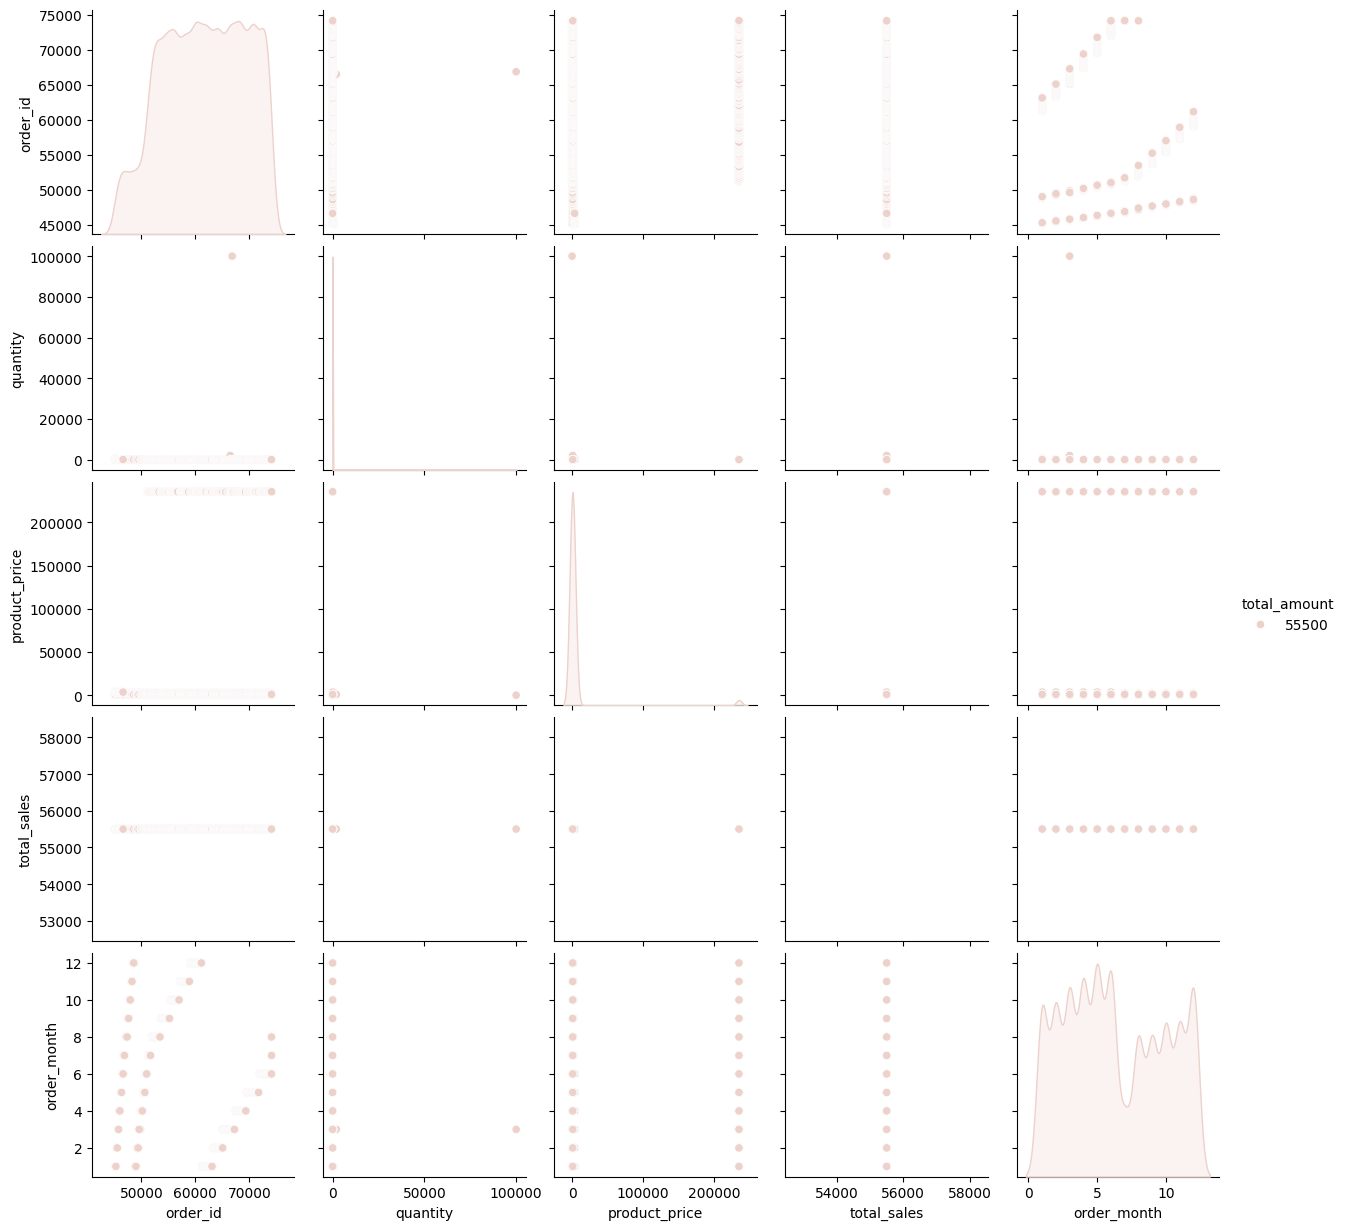

In [19]:
#pair plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfclean = pd.DataFrame(df)

# Assign the total number of rows to the 'total_sales' column
dfclean['total_amount'] = len(dfclean)

# Create pair plot
sns.pairplot(dfclean, hue='total_amount')

# Show the plot
plt.show()